## Traffic Sign Classification

In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
from PIL import Image
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from sklearn.model_selection import  train_test_split

#### Get Dataset form Kaggle

In [ ]:
# Download Dataset
!mkdir dataset
%cd dataset
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

In [3]:
# Unzip Dataset
!tar -xf gtsrb-german-traffic-sign.zip

In [ ]:
# Delete Unwanted Files
!del gtsrb-german-traffic-sign.zip
!rmdir /s/q Meta
!del Meta.csv
!del Test\GT-final_test.csv
%cd ..

#### Vizualizing Some Data

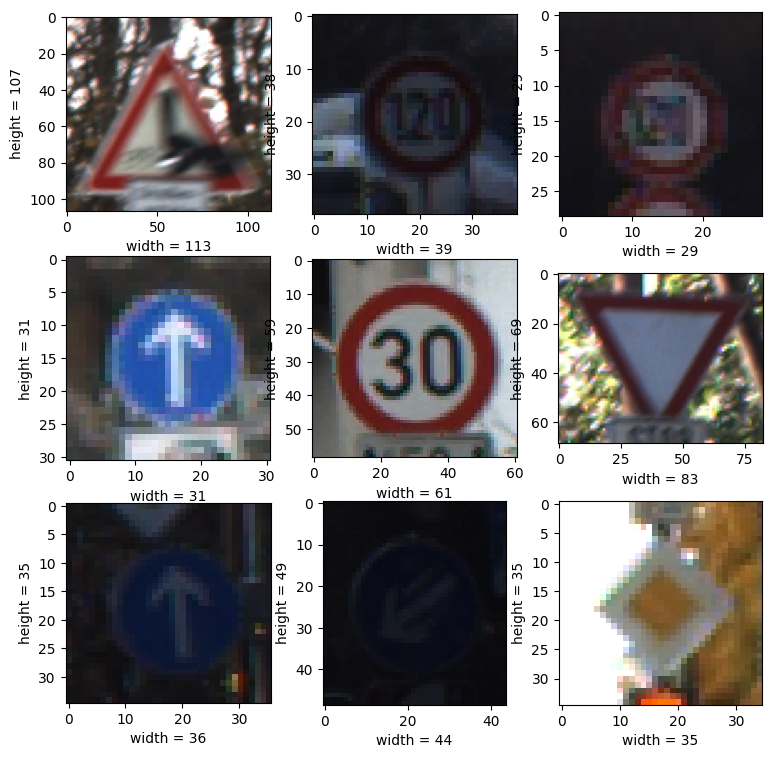

In [5]:
files = os.listdir('dataset/Test')
fig, ax = plt.subplots(3, 3, figsize = (9, 9))
for i in range(3):
    for j in range(3):
        img = imread(f'dataset/Test/{random.choice(files)}')
        ax[i][j].imshow(img)
        ax[i][j].set_xlabel(f'width = {img.shape[1]}')
        ax[i][j].set_ylabel(f'height = {img.shape[0]}')

Sizes of Images are Different.
#### Loading Images and Making Sizes of Images Same

In [6]:
# Finding Average Dimensions
avg_dim = [0, 0]
num_files = 0
for i in range(43):
    path = f'dataset/Train/{i}'
    files = os.listdir(path)
    num_files += len(files)
    for file in files:
        img = Image.open(f'{path}/{file}')
        avg_dim[0] += img.size[0]
        avg_dim[1] += img.size[1]
avg_dim[0] = round(avg_dim[0]/num_files)
avg_dim[1] = round(avg_dim[1]/num_files)

print(f'Average size of Images = ({avg_dim[0]}, {avg_dim[1]})')

Average size of Images = (51, 50)


In [7]:
# Laoding and Resizing images to (50, 50)
X_data = []
Y_data = []
for i in range(43):
    path = f'dataset/Train/{i}'
    files = os.listdir(path)
    Y_data += len(files) * [i]
    for file in files:
        img = Image.open(f'{path}/{file}').resize((50, 50))
        img = np.array(img)
        X_data.append(img)
X_data = np.array(X_data)
Y_data = np.array(Y_data)

#### Setting up Data

<BarContainer object of 43 artists>

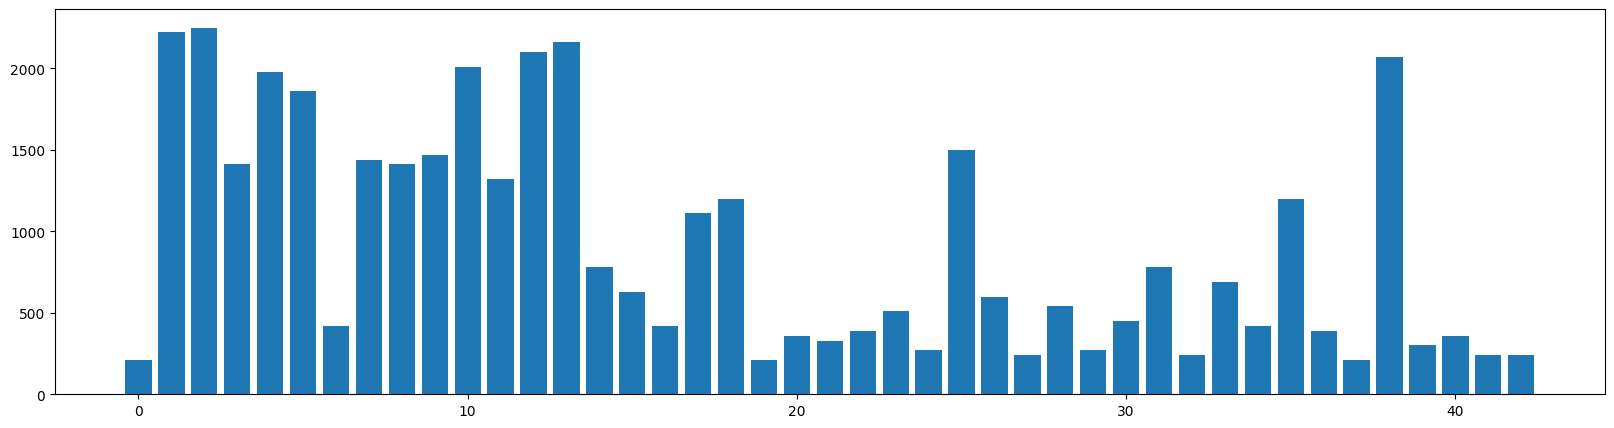

In [8]:
# Vizualizing Counts of Classes
data = np.unique(Y_data, return_counts=True)
fig, ax = plt.subplots(figsize = (20, 5))
ax.bar(data[0], data[1])

In [10]:
# Scaling the images
X_data = X_data/255

In [11]:
# Split the Data
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data , test_size=0.2)

#### Modelling

In [16]:
# Building the Model
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(50, 50, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)       

In [17]:
model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_data=(X_val, Y_val), verbose=2)

Epoch 1/10
246/246 - 9s - loss: 2.5157 - accuracy: 0.3142 - val_loss: 1.1925 - val_accuracy: 0.6996 - 9s/epoch - 38ms/step
Epoch 2/10
246/246 - 3s - loss: 1.1276 - accuracy: 0.6496 - val_loss: 0.4786 - val_accuracy: 0.8939 - 3s/epoch - 12ms/step
Epoch 3/10
246/246 - 3s - loss: 0.7301 - accuracy: 0.7636 - val_loss: 0.2768 - val_accuracy: 0.9462 - 3s/epoch - 12ms/step
Epoch 4/10
246/246 - 3s - loss: 0.5665 - accuracy: 0.8156 - val_loss: 0.1979 - val_accuracy: 0.9598 - 3s/epoch - 12ms/step
Epoch 5/10
246/246 - 3s - loss: 0.4666 - accuracy: 0.8492 - val_loss: 0.1481 - val_accuracy: 0.9722 - 3s/epoch - 12ms/step
Epoch 6/10
246/246 - 3s - loss: 0.4047 - accuracy: 0.8684 - val_loss: 0.1219 - val_accuracy: 0.9770 - 3s/epoch - 12ms/step
Epoch 7/10
246/246 - 3s - loss: 0.3618 - accuracy: 0.8822 - val_loss: 0.0920 - val_accuracy: 0.9810 - 3s/epoch - 12ms/step
Epoch 8/10
246/246 - 3s - loss: 0.3160 - accuracy: 0.8967 - val_loss: 0.0905 - val_accuracy: 0.9813 - 3s/epoch - 12ms/step
Epoch 9/10
246/2

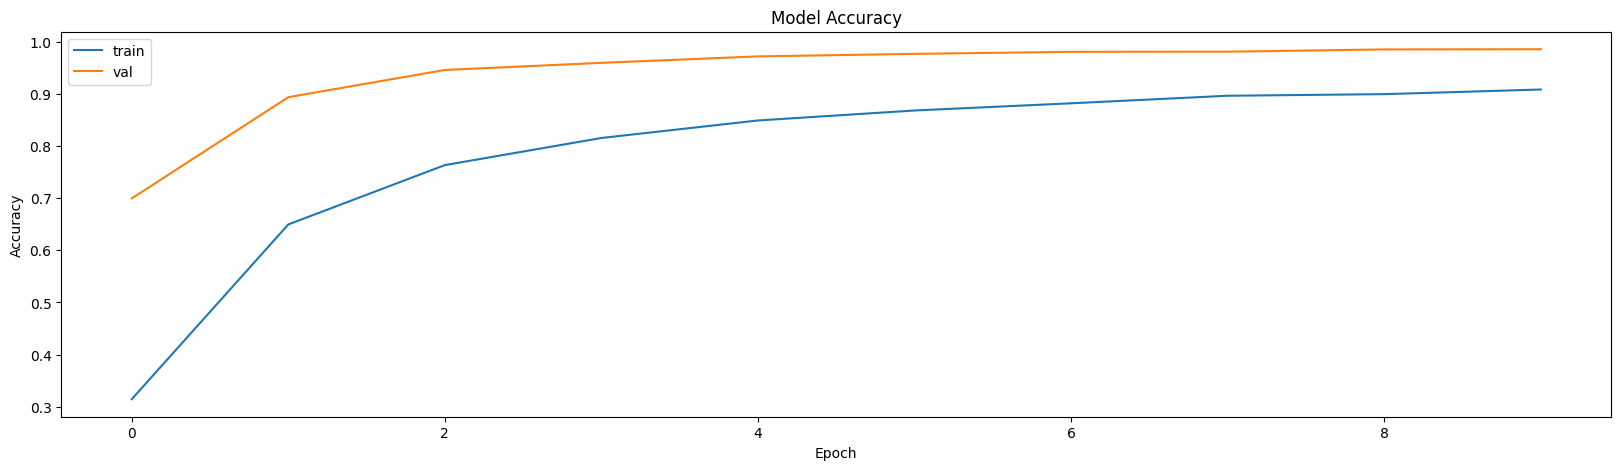

In [18]:
# Plot the Training History
fig, ax = plt.subplots(figsize = (20, 5))
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.plot(model.history.history['accuracy'], label = 'train')
ax.plot(model.history.history['val_accuracy'], label = 'val')
_ = ax.legend()

#### Loading Test Images

In [19]:
# Loading Images
path = 'dataset/Test'
files = os.listdir(path)
X_test = []
for file in files:
    img = Image.open(f'{path}/{file}').resize((50, 50))
    img = np.array(img)
    X_test.append(img)
X_test = np.array(X_test)/255

In [20]:
# Loading Labels
Y_test = pd.read_csv('dataset/Test.csv')['ClassId'].values

#### Model Evaluation

In [21]:
# Model Accuracy on Test Data
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test)
print('Accuracy over the test set: %1.0f%%' % round((score[1]*100), 2))

395/395 [==============================] - 1s 3ms/step - loss: 0.1828 - accuracy: 0.9538
Accuracy over the test set: 95%
